# The Boston House Pricing Dataset (Part I.)

The sklearn Boston dataset is used wisely in regression and is famous dataset from the 1970’s. There are 506 instances and 14 attributes, which will be shown later with a function to print the column names and descriptions of each column. [Source](https://www.engineeringbigdata.com/boston-dataset-scikit-learn-machine-learning-in-python/)

In [1]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os

In [2]:
boston = load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
data = pd.DataFrame(boston.data, columns=boston.feature_names)

In [5]:
data['TARGET'] = boston.target

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Again we don't dive deep into exploring this dataset, it is only needed for benchmarking. Standardization is problably needed for a better performing neural network, but first we take a look at the correlation matrix of the features. 

In [8]:
corr_matrix = data.corr()

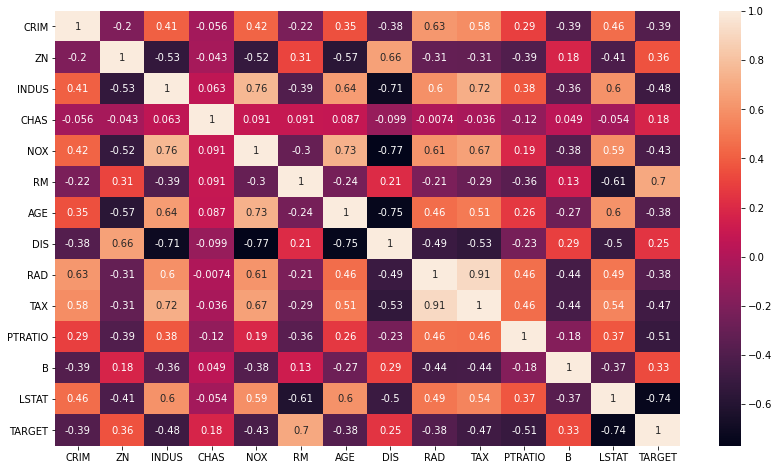

In [9]:
plt.figure(figsize = (14, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

c:\users\imetomi\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\imetomi\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\users\imetomi\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout

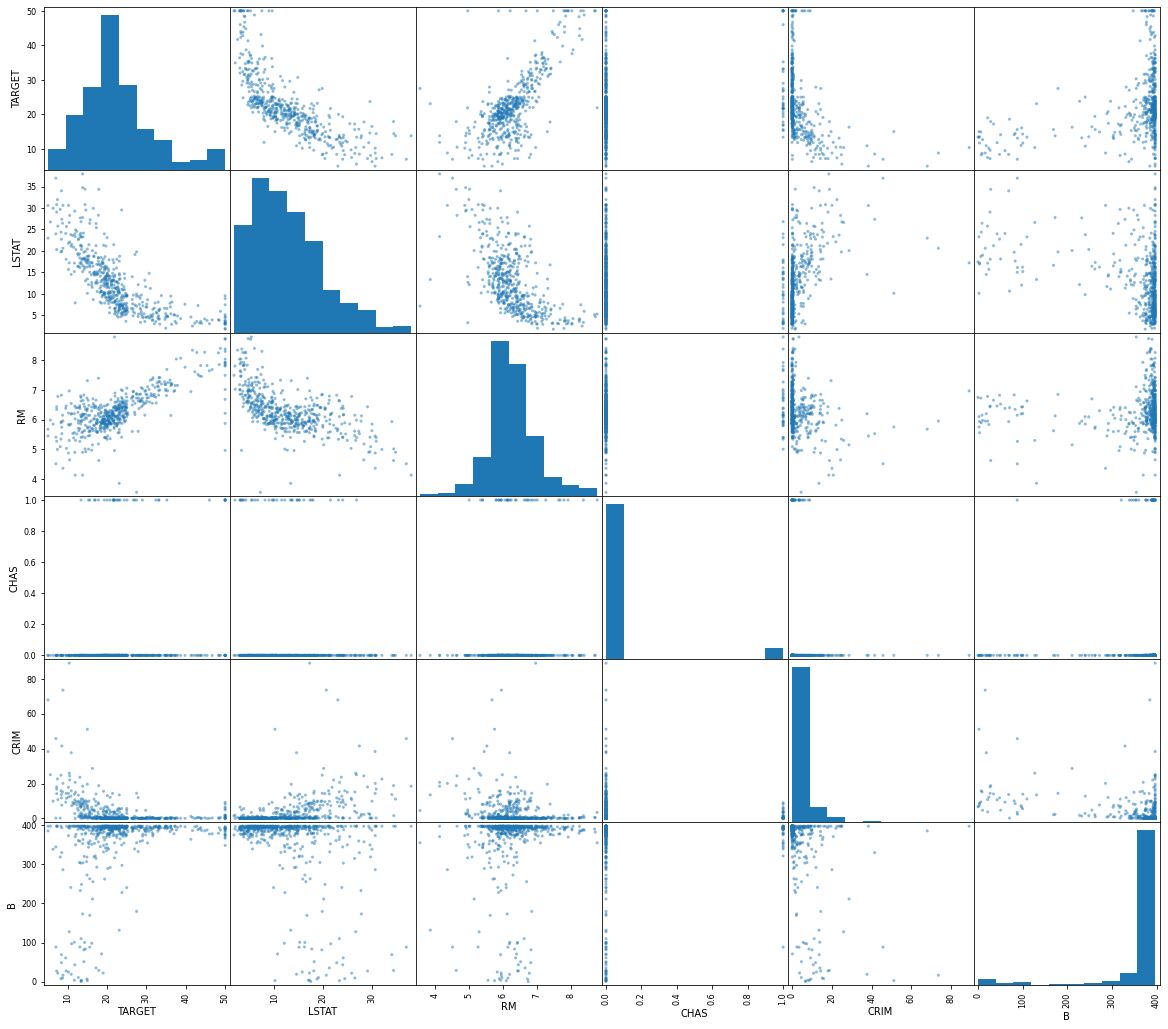

In [10]:
from pandas.plotting import scatter_matrix
attributes = ['TARGET', 'LSTAT', 'RM', 'CHAS', 'CRIM', 'B']
scatter_matrix(data[attributes], figsize=(20, 18))
plt.show()

c:\users\imetomi\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


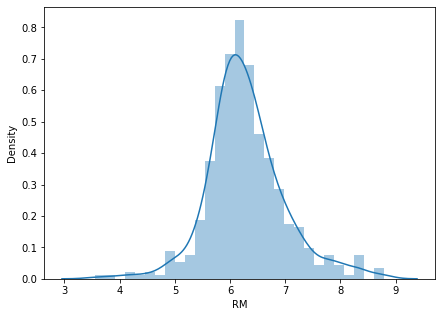

In [11]:
plt.figure(figsize=(7, 5))
sns.distplot(data['RM'])
plt.show()

c:\users\imetomi\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


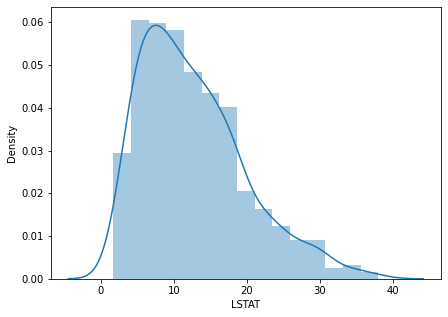

In [12]:
plt.figure(figsize=(7, 5))
sns.distplot(data['LSTAT'])
plt.show()

There is a clear linear correlation between the house price and many other features. These features are well selected and cleaned, the reason for taking a look at the data is to have a better understanding of what methods could work in making the neural network's learning process faster. Since the feed-forward networks use vectors as their input, we could feed batches for it that contain distant vectors, thus creating a higher error - further experiments and research is needed find out if it could work. 

## Standardization and Saving the Dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('TARGET', axis=1), data['TARGET'], 
                                                    shuffle=True, test_size=0.2)

In [14]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [15]:
path = 'data/boston'

In [16]:
np.save(os.path.join(path, 'boston_train_vectors'), X_train)
np.save(os.path.join(path, 'boston_test_vectors'), X_test)
np.save(os.path.join(path, 'boston_train_labels'), y_train)
np.save(os.path.join(path, 'boston_test_labels'), y_test)

# Archimedean Spiral (Part II.)

Another simple dataset that we are going to use for benchmarks is a generated double spiral.  
This dataset will consist of two separate spirals that belong to two separate classes and can be found in [Tensorflow Playground](https://playground.tensorflow.org/#activation=tanh&regularization=L1&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.28282&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) as well.  
Source: [Wikipedia](https://en.wikipedia.org/wiki/Archimedean_spiral)

In [17]:
def create_spirals(n, noise=0.4, a=20):
    b = 0.4
    df = pd.DataFrame(columns = ['x', 'y', 'xy', 'sinx', 'siny', 'x2', 'y2', 'label'])
    i = np.arange(n/2)
    t = i / n
    x1 = 0.5 + (b * t) * np.cos(t * a) 
    y1 = 0.5 + (b * t) * np.sin(t * a)
    x2 = 0.5 - (b * t) * np.cos(t * a) 
    y2 = 0.5 - (b * t) * np.sin(t * a) 
    
    df['x'] = np.concatenate([x1, x2])
    df['y'] = np.concatenate([y1, y2])
    
    # adding some extra features for making predicions
    df['xy'] = np.concatenate([x1 * y1, x2 * y2])
    df['sinx'] = np.concatenate([np.sin(x1 * a), np.sin(x2 * a)])
    df['siny'] = np.concatenate([np.sin(y1 * a), np.sin(y2 * a)])
    df['x2'] = np.concatenate([x1 * x1, x2 * x2])
    df['x2'] = np.concatenate([y1 * y1, y2 * y2])
    df['label'] = np.concatenate([np.zeros(int(n/2)), np.ones(int(n/2))])
    return df

In [18]:
spirals = create_spirals(200)

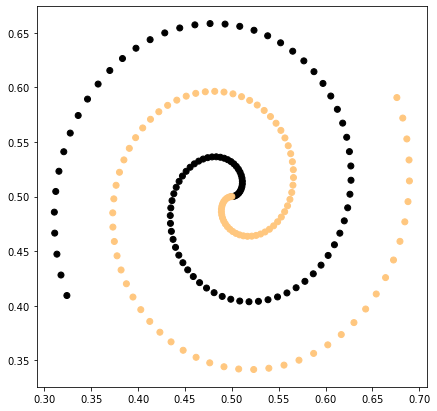

In [19]:
plt.figure(figsize=(7, 7))
plt.scatter(spirals['x'], spirals['y'], c=spirals['label'], cmap='copper')
plt.show()

In [20]:
spirals.to_csv('data/spirals.csv', index=False)